In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

# Import the data

In [130]:
df = pd.read_csv("spx_cons_norm.csv")
df.head()

,iid,gvkey,tic,datadate,industry_id,trt1m,adj_close,abnormal_volume,MA3,MA6,...,ev_ebitda,NCFP,yearmonth,sp500_prc,sp500_ret,forward_return,excess_ret,forward_excess_ret,binary_class,multi_class
0,1,1075,PNW,20100131,55,-0.6424,35.589892,NaN,NaN,NaN,...,-0.008950,0.074211,201001,1073.87,-0.036974,0.016471,0.030550,-0.012043,0.0,3.0
1,1,1078,ABT,20100131,35,-1.2039,52.302655,NaN,NaN,NaN,...,-0.136173,0.019906,201001,1073.87,-0.036974,0.025312,0.024935,-0.003202,0.0,4.0
2,1,1161,AMD,20100131,45,-22.9339,5.749131,NaN,NaN,NaN,...,0.552425,-2.097075,201001,1073.87,-0.036974,0.060322,-0.192365,0.031808,1.0,6.0
3,1,1177,AET,20100131,35,-5.4574,28.334417,NaN,NaN,NaN,...,NaN,NaN,201001,1073.87,-0.036974,0.000667,-0.017600,-0.027847,0.0,2.0
4,1,1209,APD,20100131,15,-6.2916,71.180901,NaN,NaN,NaN,...,0.438691,0.433013,201001,1073.87,-0.036974,-0.097156,-0.025942,-0.125670,0.0,0.0


In [131]:
df_1 = df.set_index('tic')
df_1
df_1 = df_1.sort_index()
df_1

,iid,gvkey,datadate,industry_id,trt1m,adj_close,abnormal_volume,MA3,MA6,MA12,...,ev_ebitda,NCFP,yearmonth,sp500_prc,sp500_ret,forward_return,excess_ret,forward_excess_ret,binary_class,multi_class
tic,,,,,,,,,,,,,,,,,,,,,
A,1,126554,20110831,35,-12.5474,33.262496,1.018890,-1.590528,-0.783581,0.729991,...,0.809282,0.262075,201108,1218.89,-0.056791,-0.152427,-0.068683,-0.080665,0.0,2.0
A,1,126554,20181231,35,-6.5321,88.585413,-0.409237,0.857171,0.767748,-0.011536,...,0.125629,-0.082275,201812,2506.85,-0.091777,0.127335,0.026456,0.048651,1.0,6.0
A,1,126554,20190831,35,2.4492,93.794618,0.281921,0.136707,-0.434991,0.374888,...,-0.055718,-0.543730,201908,2926.46,-0.018092,0.079932,0.042584,0.062751,1.0,8.0
A,1,126554,20191031,35,-1.1484,100.128574,-0.868025,0.628037,-0.682965,0.401990,...,-0.050689,-0.500873,201910,3037.56,0.020432,0.066271,-0.031916,0.032224,1.0,7.0
A,1,126554,20140930,35,-0.0840,52.821024,-0.048406,-0.589562,-0.542267,-0.829393,...,-0.000217,0.406278,201409,1972.29,-0.015514,-0.029835,0.014674,-0.053036,0.0,1.0
A,1,126554,20140228,35,-2.0980,52.404040,0.354624,-0.223813,-0.030951,-0.067482,...,-0.131125,0.630793,201402,1859.45,0.043117,-0.017741,-0.064097,-0.024673,0.0,2.0
A,1,126554,20160531,35,12.1457,58.711738,-0.088635,0.941342,0.511782,0.706750,...,0.225542,-0.736663,201605,2096.96,0.015329,-0.030835,0.106128,-0.031741,0.0,3.0
A,1,126554,20130930,35,10.1415,47.066953,0.406261,1.159028,0.519956,0.176240,...,-0.230472,-1.695947,201309,1681.55,0.029749,-0.009561,0.071666,-0.054157,0.0,1.0
A,1,126554,20130831,35,4.2701,42.733169,-0.710388,0.013639,-0.044246,-0.117911,...,-0.194445,-1.729683,201308,1632.97,-0.031298,0.101415,0.073999,0.071666,1.0,8.0


In [132]:
a = df_1.loc['A']
a

,iid,gvkey,datadate,industry_id,trt1m,adj_close,abnormal_volume,MA3,MA6,MA12,...,ev_ebitda,NCFP,yearmonth,sp500_prc,sp500_ret,forward_return,excess_ret,forward_excess_ret,binary_class,multi_class
tic,,,,,,,,,,,,,,,,,,,,,
A,1,126554,20110831,35,-12.5474,33.262496,1.018890,-1.590528,-0.783581,0.729991,...,0.809282,0.262075,201108,1218.89,-0.056791,-0.152427,-0.068683,-0.080665,0.0,2.0
A,1,126554,20181231,35,-6.5321,88.585413,-0.409237,0.857171,0.767748,-0.011536,...,0.125629,-0.082275,201812,2506.85,-0.091777,0.127335,0.026456,0.048651,1.0,6.0
A,1,126554,20190831,35,2.4492,93.794618,0.281921,0.136707,-0.434991,0.374888,...,-0.055718,-0.543730,201908,2926.46,-0.018092,0.079932,0.042584,0.062751,1.0,8.0
A,1,126554,20191031,35,-1.1484,100.128574,-0.868025,0.628037,-0.682965,0.401990,...,-0.050689,-0.500873,201910,3037.56,0.020432,0.066271,-0.031916,0.032224,1.0,7.0
A,1,126554,20140930,35,-0.0840,52.821024,-0.048406,-0.589562,-0.542267,-0.829393,...,-0.000217,0.406278,201409,1972.29,-0.015514,-0.029835,0.014674,-0.053036,0.0,1.0
A,1,126554,20140228,35,-2.0980,52.404040,0.354624,-0.223813,-0.030951,-0.067482,...,-0.131125,0.630793,201402,1859.45,0.043117,-0.017741,-0.064097,-0.024673,0.0,2.0
A,1,126554,20160531,35,12.1457,58.711738,-0.088635,0.941342,0.511782,0.706750,...,0.225542,-0.736663,201605,2096.96,0.015329,-0.030835,0.106128,-0.031741,0.0,3.0
A,1,126554,20130930,35,10.1415,47.066953,0.406261,1.159028,0.519956,0.176240,...,-0.230472,-1.695947,201309,1681.55,0.029749,-0.009561,0.071666,-0.054157,0.0,1.0
A,1,126554,20130831,35,4.2701,42.733169,-0.710388,0.013639,-0.044246,-0.117911,...,-0.194445,-1.729683,201308,1632.97,-0.031298,0.101415,0.073999,0.071666,1.0,8.0


# Deal with the missing values

In [133]:
df.isnull().sum()

iid                      0
gvkey                    0
tic                      0
datadate                 0
industry_id              0
trt1m                    6
adj_close                6
abnormal_volume       5416
MA3                    974
MA6                   2451
MA12                  5417
EMA3                     0
EMA6                     0
EMA12                    0
NI_growth              170
Size                     0
PriceCap                 0
ROE                      0
ROA                     13
ROI                     13
NetPM                 2366
epspi12                  7
earnings                 0
earningsVol            137
Asset Turnover        2382
PE                    1201
PB                       0
PS                       0
dividend_yield        5416
ev_ebitda             6036
NCFP                  5032
yearmonth                0
sp500_prc                0
sp500_ret                0
forward_return           0
excess_ret               6
forward_excess_ret       0
b

In [134]:
df = pd.concat([df, pd.get_dummies(df['industry_id'])], axis=1); df

,iid,gvkey,tic,datadate,industry_id,trt1m,adj_close,abnormal_volume,MA3,MA6,...,15,20,25,30,35,40,45,50,55,60
0,1,1075,PNW,20100131,55,-0.6424,35.589892,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,1,1078,ABT,20100131,35,-1.2039,52.302655,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
2,1,1161,AMD,20100131,45,-22.9339,5.749131,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
3,1,1177,AET,20100131,35,-5.4574,28.334417,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
4,1,1209,APD,20100131,15,-6.2916,71.180901,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
5,1,1279,AYE,20100131,55,-10.7751,18.692617,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
6,1,1300,HON,20100131,20,-1.4286,38.087989,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
7,1,1356,AA.3,20100131,15,-21.0298,10.052906,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
8,1,1380,HES,20100131,10,-4.4793,55.201413,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,1,1408,BEAM.2,20100131,30,-3.7731,40.001522,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0


In [135]:
df = df.dropna(subset=['forward_excess_ret'])
df.isnull().sum()

iid                      0
gvkey                    0
tic                      0
datadate                 0
industry_id              0
trt1m                    6
adj_close                6
abnormal_volume       5416
MA3                    974
MA6                   2451
MA12                  5417
EMA3                     0
EMA6                     0
EMA12                    0
NI_growth              170
Size                     0
PriceCap                 0
ROE                      0
ROA                     13
ROI                     13
NetPM                 2366
epspi12                  7
earnings                 0
earningsVol            137
Asset Turnover        2382
PE                    1201
PB                       0
PS                       0
dividend_yield        5416
ev_ebitda             6036
NCFP                  5032
yearmonth                0
sp500_prc                0
sp500_ret                0
forward_return           0
excess_ret               6
forward_excess_ret       0
b

In [136]:
df.columns

Index([               'iid',              'gvkey',                'tic',
                 'datadate',        'industry_id',              'trt1m',
                'adj_close',    'abnormal_volume',                'MA3',
                      'MA6',               'MA12',               'EMA3',
                     'EMA6',              'EMA12',          'NI_growth',
                     'Size',           'PriceCap',                'ROE',
                      'ROA',                'ROI',              'NetPM',
                  'epspi12',           'earnings',        'earningsVol',
           'Asset Turnover',                 'PE',                 'PB',
                       'PS',     'dividend_yield',          'ev_ebitda',
                     'NCFP',          'yearmonth',          'sp500_prc',
                'sp500_ret',     'forward_return',         'excess_ret',
       'forward_excess_ret',       'binary_class',        'multi_class',
                         10,                   15, 

In [137]:
X = df[['tic','ROE','Asset Turnover','MA12','Size','PB','ev_ebitda']]
X

,tic,ROE,Asset Turnover,MA12,Size,PB,ev_ebitda
0,PNW,-0.848621,-0.860151,NaN,-1.129360,-0.791378,-0.008950
1,ABT,0.242671,-0.425208,NaN,1.713378,0.359587,-0.136173
2,AMD,0.632837,-0.286949,NaN,-0.483672,-0.026130,0.552425
3,AET,0.762287,-0.153632,NaN,-0.072241,-1.002210,NaN
4,APD,0.414194,-0.624734,NaN,0.977355,0.470601,0.438691
5,AYE,0.340379,-0.672337,NaN,-1.158804,-0.546603,-0.466785
6,HON,0.665324,-0.223359,NaN,1.126169,0.068103,-0.311831
7,AA.3,-1.414975,-1.263135,NaN,0.667718,-1.244308,0.059126
8,HES,0.321347,0.616226,NaN,0.319954,-0.568044,0.084642
9,BEAM.2,0.031374,-0.996423,NaN,-0.646358,0.047289,-0.497387


In [138]:
X.isnull().sum()

tic                  0
ROE                  0
Asset Turnover    2382
MA12              5417
Size                 0
PB                   0
ev_ebitda         6036
dtype: int64

In [139]:
X = X.set_index('tic', append=True)

In [140]:
X.isnull().sum()

ROE                  0
Asset Turnover    2382
MA12              5417
Size                 0
PB                   0
ev_ebitda         6036
dtype: int64

In [141]:
X = X.groupby(level=1).ffill()
X.isnull().sum()

tic                  0
ROE                  0
Asset Turnover    2345
MA12               199
Size                 0
PB                   0
ev_ebitda         2714
dtype: int64

In [142]:
X = X.fillna(X.mean())
X.isnull().sum()

tic               0
ROE               0
Asset Turnover    0
MA12              0
Size              0
PB                0
ev_ebitda         0
dtype: int64

In [143]:
y =df[['binary_class']].values
y = y.ravel()
count_number = pd.value_counts(pd.Series(y))
count_number

0.0    29123
1.0    29067
dtype: int64

In [103]:
roe = X['ROE'].values
at = X['Asset Turnover'].values
ema = X['MA12'].values
ev = X['Size'].values
ps = X['PB'].values
evti = X['ev_ebitda'].values

Text(0.5,0,'ROE')

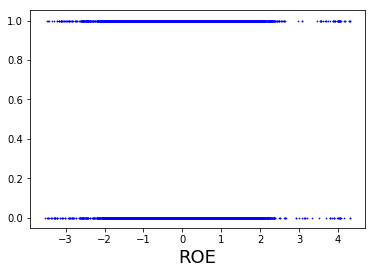

In [104]:
plt.scatter(roe, y, c ="blue", s =0.5) 
plt.xlabel('ROE', fontsize=18)

Text(0.5,0,'Asset Turnover')

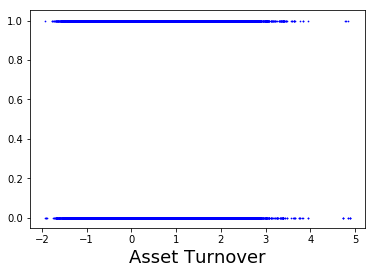

In [105]:
plt.scatter(at, y, c ="blue", s =0.5) 
plt.xlabel('Asset Turnover', fontsize=18)

Text(0.5,0,'EMA6')

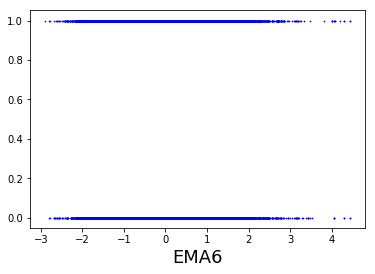

In [106]:
plt.scatter(ema, y, c ="blue", s =0.5) 
plt.xlabel('EMA6', fontsize=18)

Text(0.5,0,'earnings Vol')

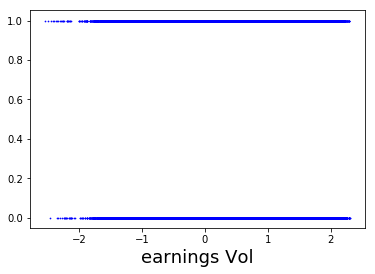

In [107]:
plt.scatter(ev, y, c ="blue", s =0.5) 
plt.xlabel('earnings Vol', fontsize=18)

Text(0.5,0,'PS')

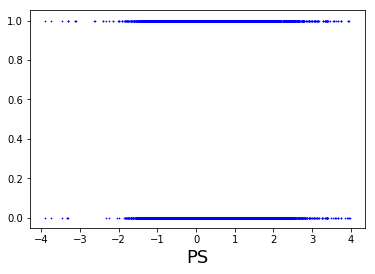

In [108]:
plt.scatter(ps, y, c ="blue", s =0.5) 
plt.xlabel('PS', fontsize=18)

Text(0.5,0,'ev_ebitda')

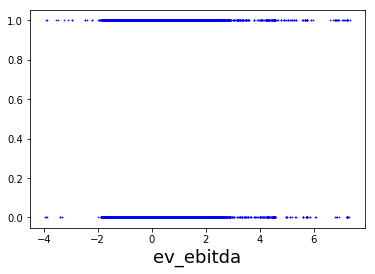

In [109]:
plt.scatter(evti, y, c ="blue", s =0.5) 
plt.xlabel('ev_ebitda', fontsize=18)

In [144]:
X = X[['ROE','Asset Turnover','MA12','Size','PB','ev_ebitda']]
X

,,ROE,Asset Turnover,MA12,Size,PB,ev_ebitda
,tic,,,,,,
0,PNW,-0.848621,-0.860151,-0.059884,-1.129360,-0.791378,-0.008950
1,ABT,0.242671,-0.425208,0.814836,1.713378,0.359587,-0.136173
2,AMD,0.632837,-0.286949,1.955585,-0.483672,-0.026130,0.552425
3,AET,0.762287,-0.153632,0.419770,-0.072241,-1.002210,0.112605
4,APD,0.414194,-0.624734,-0.107580,0.977355,0.470601,0.438691
5,AYE,0.340379,-0.672337,-0.042106,-1.158804,-0.546603,-0.466785
6,HON,0.665324,-0.223359,0.328120,1.126169,0.068103,-0.311831
7,AA.3,-1.414975,-1.263135,1.770208,0.667718,-1.244308,0.059126
8,HES,0.321347,0.616226,0.063791,0.319954,-0.568044,0.084642


In [145]:
X = X.values
X

array([[-0.84862125, -0.86015111, -0.05988425, -1.1293601 , -0.79137844,
        -0.00895021],
       [ 0.24267088, -0.42520843,  0.81483598,  1.71337836,  0.3595868 ,
        -0.13617262],
       [ 0.63283699, -0.28694886,  1.9555854 , -0.48367165, -0.02612988,
         0.55242501],
       ...,
       [ 0.25164896,  1.39398733,  0.87456933, -0.8799526 , -0.27864472,
         0.04004341],
       [ 1.6632405 ,  1.77813236, -0.17497343,  0.62802986,  0.21951278,
        -0.89879859],
       [-0.18101587,  0.21553362,  0.73469627, -0.93544031,  0.02190667,
         0.68339882]])

In [146]:
y =df[['binary_class']].values
y

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [147]:
X.shape

(58190, 6)

In [172]:
y2 =df[['multi_class']].values
y2.shape

(58190, 1)

In [173]:
y2

array([[3.],
       [4.],
       [6.],
       ...,
       [5.],
       [4.],
       [6.]])

# Train Test Split

In [148]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, KFold
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state= 52)
X_train.shape

(40733, 6)

In [149]:
count = Y_test.ravel()
count = pd.value_counts(pd.Series(count))
count

0.0    8749
1.0    8708
dtype: int64

In [174]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, y2, test_size = 0.3, random_state= 52)
X_train2.shape

(40733, 6)

# Binary

# SVM

In [159]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svm= SVC(kernel = "rbf", decision_function_shape = 'ovr')
param_grid0 = {"C":[1, 0.01,0.1],
               "gamma" : ['scale','auto'],
             }

grid_search0 = GridSearchCV(svm, param_grid=param_grid0, scoring='accuracy', cv=5, return_train_score = True)

grid_search0.fit(X_train, Y_train.ravel()) 

print("Scores on training set:")
means = grid_search0.cv_results_['mean_test_score']
stds = grid_search0.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search0.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Scores on training set:
0.504 (+/-0.008) for {'C': 1, 'gamma': 'scale'}
0.502 (+/-0.009) for {'C': 1, 'gamma': 'auto'}
0.498 (+/-0.007) for {'C': 0.01, 'gamma': 'scale'}
0.499 (+/-0.006) for {'C': 0.01, 'gamma': 'auto'}
0.505 (+/-0.013) for {'C': 0.1, 'gamma': 'scale'}
0.504 (+/-0.012) for {'C': 0.1, 'gamma': 'auto'}


In [160]:
print(grid_search0.cv_results_['std_test_score'][grid_search0.best_index_])

0.006278544378216459


In [161]:
print(grid_search0.cv_results_) 
print(grid_search0.best_params_)

{'mean_fit_time': array([38.82302508, 38.70063186, 39.83950758, 38.77902565, 38.32532744,
       39.21493392]), 'std_fit_time': array([0.57437407, 0.58155087, 2.00833512, 0.88900386, 0.43374302,
       2.1027747 ]), 'mean_score_time': array([5.98893685, 5.87445021, 6.17467451, 6.07697401, 5.96058125,
       6.53167686]), 'std_score_time': array([0.08988665, 0.03213848, 0.24455974, 0.12804639, 0.15868791,
       1.11466624]), 'param_C': masked_array(data=[1, 1, 0.01, 0.01, 0.1, 0.1],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=['scale', 'auto', 'scale', 'auto', 'scale', 'auto'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'gamma': 'scale'}, {'C': 1, 'gamma': 'auto'}, {'C': 0.01, 'gamma': 'scale'}, {'C': 0.01, 'gamma': 'auto'}, {'C': 0.1, 'gamma': 'scale'}, {'C': 0.1, 'gamma': 'auto'}], 'split0_test_sc

In [162]:
SVM_f = grid_search0.best_estimator_.fit(X_train, Y_train.ravel())

y_hat0 = SVM_f.predict(X_test)
svm_score = SVM_f.score(X_test, Y_test)
print("SVM Scores on Testing set: ", end='')
print(svm_score)

SVM Scores on Testing set: 0.5035229420862691


In [163]:
confusion_svm = confusion_matrix(Y_test, y_hat0)
confusion_svm

array([[5689, 3060],
       [5607, 3101]], dtype=int64)

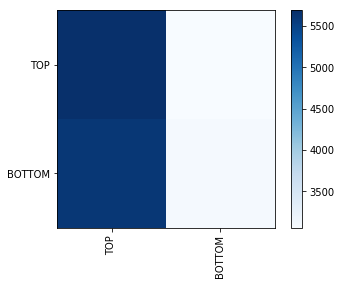

In [164]:
columns = ['TOP','BOTTOM']

plt.imshow(confusion_svm, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,], columns, rotation='vertical')
plt.yticks([0,1,], columns)
plt.colorbar()

plt.show()

In [165]:
print(classification_report(Y_test,y_hat0))

              precision    recall  f1-score   support

         0.0       0.50      0.65      0.57      8749
         1.0       0.50      0.36      0.42      8708

   micro avg       0.50      0.50      0.50     17457
   macro avg       0.50      0.50      0.49     17457
weighted avg       0.50      0.50      0.49     17457



# Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)

param_grid2 = {"criterion" : ["gini",'entropy'],
              "max_depth" :   [2,3,4],
               'min_samples_split' : [2,5,10]
             }

grid_search3 = GridSearchCV(tree, param_grid=param_grid2,scoring='accuracy', cv=5, return_train_score = True)
grid_search3.fit(X_train, Y_train.ravel()) 

print("Scores on training set:")
means = grid_search3.cv_results_['mean_test_score']
stds = grid_search3.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search3.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print(grid_search3.best_params_)

Scores on training set:
0.501 (+/-0.004) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
0.501 (+/-0.004) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 5}
0.501 (+/-0.004) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 10}
0.502 (+/-0.006) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
0.502 (+/-0.006) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}
0.502 (+/-0.006) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10}
0.499 (+/-0.005) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
0.499 (+/-0.005) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 5}
0.499 (+/-0.005) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 10}
0.501 (+/-0.004) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}
0.501 (+/-0.004) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 5}
0.501 (+/-0.004) for {'criterion': 'entropy', 'max_dep

In [151]:
print(grid_search3.cv_results_) 
print(grid_search3.best_params_)

{'mean_fit_time': array([0.07996116, 0.06669645, 0.06170964, 0.09155049, 0.09617133,
       0.09370537, 0.12712045, 0.12172241, 0.12200675, 0.0982429 ,
       0.09539857, 0.09585848, 0.13743248, 0.13750992, 0.13892322,
       0.18383651, 0.18567266, 0.18084817]), 'std_fit_time': array([0.03101526, 0.00365845, 0.00074553, 0.00114629, 0.00551515,
       0.00293872, 0.00266717, 0.00667123, 0.00557795, 0.00768251,
       0.00229825, 0.00546498, 0.00413544, 0.00265037, 0.00231735,
       0.00233627, 0.00478841, 0.00285268]), 'mean_score_time': array([0.02099042, 0.001373  , 0.00184102, 0.00097184, 0.00173955,
       0.00136614, 0.00155506, 0.0015883 , 0.00175767, 0.00195489,
       0.001367  , 0.00175676, 0.00156622, 0.00197449, 0.00136657,
       0.00213656, 0.00128479, 0.00136619]), 'std_score_time': array([3.90511278e-02, 4.86514347e-04, 4.71712985e-04, 1.62568606e-05,
       4.06790179e-04, 4.78597895e-04, 4.72464386e-04, 4.81374194e-04,
       3.90556105e-04, 3.64125668e-05, 4.78475251

In [153]:
DT = grid_search3.best_estimator_.fit(X_train, Y_train.ravel())

y_hat1 = DT.predict(X_test)
Decision_tree_score = DT.score(X_test, Y_test)
print("Decision Tree Scores on Testing set: ", end='')
print(Decision_tree_score)

Decision Tree Scores on Testing set: 0.5003150598613737


In [156]:
confusion_dt = confusion_matrix(Y_test, y_hat1)
confusion_dt

array([[7656, 1093],
       [7630, 1078]], dtype=int64)

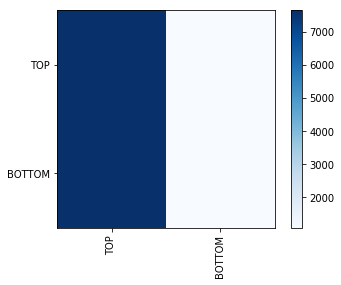

In [157]:
columns = ['TOP','BOTTOM']

plt.imshow(confusion_dt, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,], columns, rotation='vertical')
plt.yticks([0,1,], columns)
plt.colorbar()

plt.show()

In [158]:
print(classification_report(Y_test,y_hat1))

              precision    recall  f1-score   support

         0.0       0.50      0.88      0.64      8749
         1.0       0.50      0.12      0.20      8708

   micro avg       0.50      0.50      0.50     17457
   macro avg       0.50      0.50      0.42     17457
weighted avg       0.50      0.50      0.42     17457



# 10 Classes

# Decision Tree

In [176]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)

param_grid2 = {"criterion" : ["gini",'entropy'],
              "max_depth" :   [2,3,4],
               'min_samples_split' : [2,5,10]
             }

grid_search3 = GridSearchCV(tree, param_grid=param_grid2,scoring='accuracy', cv=5, return_train_score = True)
grid_search3.fit(X_train2, Y_train2.ravel()) 

print("Scores on training set:")
means = grid_search3.cv_results_['mean_test_score']
stds = grid_search3.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search3.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print(grid_search3.best_params_)

Scores on training set:
0.114 (+/-0.008) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
0.114 (+/-0.008) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 5}
0.114 (+/-0.008) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 10}
0.114 (+/-0.008) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
0.114 (+/-0.008) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}
0.114 (+/-0.008) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10}
0.114 (+/-0.008) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
0.114 (+/-0.008) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 5}
0.114 (+/-0.008) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 10}
0.114 (+/-0.008) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}
0.114 (+/-0.008) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 5}
0.114 (+/-0.008) for {'criterion': 'entropy', 'max_dep

In [177]:
print(grid_search3.cv_results_) 
print(grid_search3.best_params_)

{'mean_fit_time': array([0.07281022, 0.07760072, 0.07830553, 0.10941615, 0.1073596 ,
       0.10307593, 0.13340206, 0.14025378, 0.14069576, 0.23695993,
       0.23484874, 0.25004067, 0.35117435, 0.3608881 , 0.35146627,
       0.47049794, 0.46641827, 0.47207847]), 'std_fit_time': array([0.00286876, 0.00366431, 0.00708212, 0.00582361, 0.0044937 ,
       0.00819679, 0.00648315, 0.00655858, 0.00999297, 0.01062445,
       0.00981219, 0.01934709, 0.01740828, 0.00980985, 0.00613989,
       0.01388429, 0.00790774, 0.02216391]), 'mean_score_time': array([0.00176454, 0.00156207, 0.0017571 , 0.00155859, 0.0017571 ,
       0.00197229, 0.0011621 , 0.00155487, 0.00193644, 0.0013576 ,
       0.00137148, 0.00155783, 0.0017478 , 0.00117054, 0.00157394,
       0.00175605, 0.00176792, 0.00136719]), 'std_score_time': array([0.00039421, 0.0007802 , 0.00073054, 0.00078271, 0.00038991,
       0.0006176 , 0.00037239, 0.00047444, 0.00088472, 0.00076244,
       0.00047525, 0.00050042, 0.00041225, 0.0003913 , 0.

In [180]:
DT = grid_search3.best_estimator_.fit(X_train2, Y_train2.ravel())

y_hat1 = DT.predict(X_test2)
Decision_tree_score = DT.score(X_test2, Y_test2)
print("Decision Tree Scores on Testing set: ", end='')
print(Decision_tree_score)

Decision Tree Scores on Testing set: 0.10998453342498711


In [181]:
confusion_dt = confusion_matrix(Y_test2, y_hat1)
confusion_dt

array([[ 194,    0,    0,    0,  344,    0,    0,    0,    0, 1232],
       [ 104,    0,    0,    0,  462,    0,    0,    0,    0, 1182],
       [  95,    0,    0,    0,  504,    0,    0,    0,    0, 1198],
       [  78,    0,    0,    0,  500,    0,    0,    0,    0, 1152],
       [  63,    0,    0,    0,  507,    0,    0,    0,    0, 1134],
       [  54,    0,    0,    0,  506,    0,    0,    0,    0, 1137],
       [  70,    0,    0,    0,  499,    0,    0,    0,    0, 1189],
       [  71,    0,    0,    0,  515,    0,    0,    0,    0, 1170],
       [ 109,    0,    0,    0,  445,    0,    0,    0,    0, 1212],
       [ 179,    0,    0,    0,  333,    0,    0,    0,    0, 1219]],
      dtype=int64)

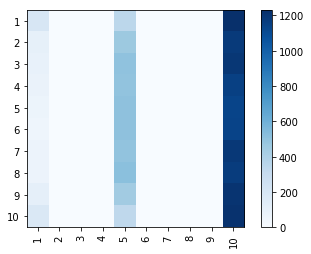

In [182]:
columns = [1,2,3,4,5,6,7,8,9,10]

plt.imshow(confusion_dt, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6,7,8,9,], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5,6,7,8,9], columns)
plt.colorbar()

plt.show()

In [183]:
print(classification_report(Y_test2,y_hat1))

              precision    recall  f1-score   support

         0.0       0.19      0.11      0.14      1770
         1.0       0.00      0.00      0.00      1748
         2.0       0.00      0.00      0.00      1797
         3.0       0.00      0.00      0.00      1730
         4.0       0.11      0.30      0.16      1704
         5.0       0.00      0.00      0.00      1697
         6.0       0.00      0.00      0.00      1758
         7.0       0.00      0.00      0.00      1756
         8.0       0.00      0.00      0.00      1766
         9.0       0.10      0.70      0.18      1731

   micro avg       0.11      0.11      0.11     17457
   macro avg       0.04      0.11      0.05     17457
weighted avg       0.04      0.11      0.05     17457



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM

In [184]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svm= SVC(kernel = "rbf", decision_function_shape = 'ovo')
param_grid0 = {"C":[1, 0.01,0.1],
               "gamma" : ['scale','auto'],
             }

grid_search0 = GridSearchCV(svm, param_grid=param_grid0, scoring='accuracy', cv=5, return_train_score = True)

grid_search0.fit(X_train2, Y_train2.ravel()) 

print("Scores on training set:")
means = grid_search0.cv_results_['mean_test_score']
stds = grid_search0.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search0.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Scores on training set:
0.120 (+/-0.006) for {'C': 1, 'gamma': 'scale'}
0.120 (+/-0.006) for {'C': 1, 'gamma': 'auto'}
0.119 (+/-0.004) for {'C': 0.01, 'gamma': 'scale'}
0.118 (+/-0.005) for {'C': 0.01, 'gamma': 'auto'}
0.119 (+/-0.003) for {'C': 0.1, 'gamma': 'scale'}
0.120 (+/-0.002) for {'C': 0.1, 'gamma': 'auto'}


In [186]:
print(grid_search0.cv_results_) 
print(grid_search0.best_params_)

{'mean_fit_time': array([90.55549273, 89.6049304 , 94.48674717, 90.48876648, 89.29820046,
       85.7073307 ]), 'std_fit_time': array([3.09598639, 5.08800045, 3.37832676, 1.64096799, 4.04361544,
       1.2757395 ]), 'mean_score_time': array([9.8298583 , 9.40353484, 9.75777593, 9.45008254, 9.4011519 ,
       9.3976284 ]), 'std_score_time': array([0.38262958, 0.17283217, 0.14251209, 0.21401096, 0.13587049,
       0.14485235]), 'param_C': masked_array(data=[1, 1, 0.01, 0.01, 0.1, 0.1],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=['scale', 'auto', 'scale', 'auto', 'scale', 'auto'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'gamma': 'scale'}, {'C': 1, 'gamma': 'auto'}, {'C': 0.01, 'gamma': 'scale'}, {'C': 0.01, 'gamma': 'auto'}, {'C': 0.1, 'gamma': 'scale'}, {'C': 0.1, 'gamma': 'auto'}], 'split0_test_sc

In [187]:
SVM_f = grid_search0.best_estimator_.fit(X_train2, Y_train2.ravel())

y_hat0 = SVM_f.predict(X_test2)
svm_score = SVM_f.score(X_test2, Y_test2)
print("SVM Scores on Testing set: ", end='')
print(svm_score)

SVM Scores on Testing set: 0.11886349315460847


In [188]:
confusion_svm = confusion_matrix(Y_test2, y_hat0)
confusion_svm

array([[431,  58,  24, 128, 451, 151,  26,  51,  61, 389],
       [261,  62,  33, 138, 581, 169,  46,  56,  51, 351],
       [255,  45,  43, 137, 587, 218,  48,  73,  58, 333],
       [231,  43,  30, 144, 618, 214,  38,  60,  63, 289],
       [200,  48,  27, 156, 616, 197,  53,  72,  49, 286],
       [205,  59,  31, 127, 615, 215,  42,  68,  53, 282],
       [230,  41,  33, 139, 618, 234,  43,  69,  57, 294],
       [242,  57,  34, 156, 619, 210,  42,  62,  58, 276],
       [279,  42,  35, 141, 608, 187,  39,  62,  41, 332],
       [412,  44,  30, 104, 435, 130,  44,  60,  54, 418]], dtype=int64)

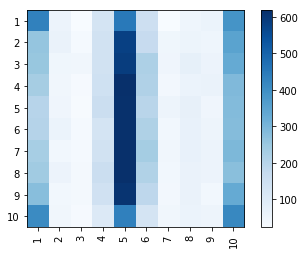

In [189]:
columns = [1,2,3,4,5,6,7,8,9,10]

plt.imshow(confusion_svm, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6,7,8,9,], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5,6,7,8,9], columns)
plt.colorbar()

plt.show()

In [190]:
print(classification_report(Y_test2,y_hat0))

              precision    recall  f1-score   support

         0.0       0.16      0.24      0.19      1770
         1.0       0.12      0.04      0.06      1748
         2.0       0.13      0.02      0.04      1797
         3.0       0.11      0.08      0.09      1730
         4.0       0.11      0.36      0.17      1704
         5.0       0.11      0.13      0.12      1697
         6.0       0.10      0.02      0.04      1758
         7.0       0.10      0.04      0.05      1756
         8.0       0.08      0.02      0.04      1766
         9.0       0.13      0.24      0.17      1731

   micro avg       0.12      0.12      0.12     17457
   macro avg       0.11      0.12      0.10     17457
weighted avg       0.11      0.12      0.10     17457

